# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набрано как минимум 2 балла из 10.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR и добавляете проверяющих вне зависимости от того чьи семинары вы посещали
    `@boyarnikov`
    `@KatyaProkhorchuk`

**Проверяющие не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%pip install gdown


In [ ]:
!gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100% 3.98M/3.98M [00:00<00:00, 46.6MB/s]


Начнем с необходимых приготовлений.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [32]:
coins = pd.read_csv('coins.csv')
coins_original = pd.read_csv('coins.csv')
# print(coins.loc[0:2,['date','price']])
# print(coins.iloc[0:3,0:2])
# coins.loc[(coins.price > 19000)&(coins.symbol == 'BTC')]
# print(pd.__version__)
# coins.info()
coins.index

RangeIndex(start=0, stop=37588, step=1)

In [30]:
coins.set_index('date',inplace = True)


Посмотрим что получилось

In [26]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.88e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.50e+09
2013-04-28,4.30,9174.0,4.43e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.38e+07
2013-04-29,134.44,51602.0,1.14e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.49e+09
2013-04-29,4.37,9275.0,3.65e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.50e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [28]:
print(len(set(coins['name'])))
print(len(set(coins['symbol'])))

70
66


### 2. За какой период данные мы имеем? (0.4 балла)

In [31]:
coins.index = pd.to_datetime(coins.index, format = 'mixed')
print(coins.index.min())
print(coins.index.max())
print(coins.index.max() - coins.index.min())

2013-04-28 00:00:00
2018-06-06 00:00:00
1865 days 00:00:00


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [34]:
# coins.info()
coins.isnull().sum()
# coins.duplicated()

,0
date,0
price,327
txCount,1520
txVolume,1830
activeAddresses,1520
symbol,0
name,0
open,0
high,0
low,0


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [33]:
print("At a date of", coins_original.loc[coins_original['price'].idxmax()]['date'], "coin named", coins_original.loc[coins_original['price'].idxmax()]['name'], "had a maximum value of", coins['price'].max())


At a date of 2017-12-17 coin named Bitcoin had a maximum value of 19475.8


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

name               iCoin
market    30782136351.02
dtype: object
name            0x
market    41600.98
dtype: object


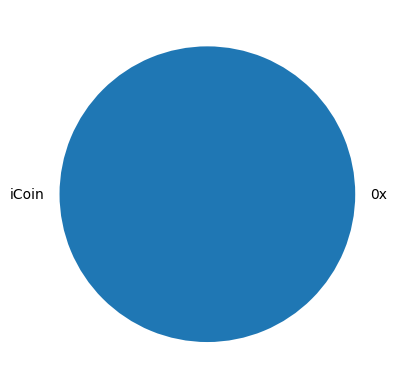

In [35]:
coins1 = coins.groupby(['name'])['market'].mean().reset_index()
print(coins1.max())
print(coins1.min())
categories = [coins1.max()['name'], coins1.min()['name']]
values = np.array([coins1.max()['market'], coins1.min()['market']])
plt.pie(values, labels = categories)
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [36]:
%pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_fancy_price_action(coins, symbol, start_date, end_date):
    # Paste your code here
    coins_candle = coins[coins['symbol'] == symbol]
    coins_candle['date'] = pd.to_datetime(coins_candle['date'])
    coins_candle.set_index('date', inplace=True)
    coins_candle = coins_candle.loc[start_date:end_date]
    if coins_candle.empty:
        print("Нет данных для заданного диапазона дат.")
        return
    ohlc = coins_candle[['open', 'high', 'low', 'close']]
    mpf.plot(ohlc,
             type='candle',
             title=f"{symbol} CandleStick graph {start_date} to {end_date}",
             style='nightclouds',
             ylabel='Цена',
             figsize=(18, 9),
             volume=False)
    # plt.grid()
    plt.show()

Посмотрим, что получилось:

<ipython-input-37-16dfcd91eccd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coins_candle['date'] = pd.to_datetime(coins_candle['date'])


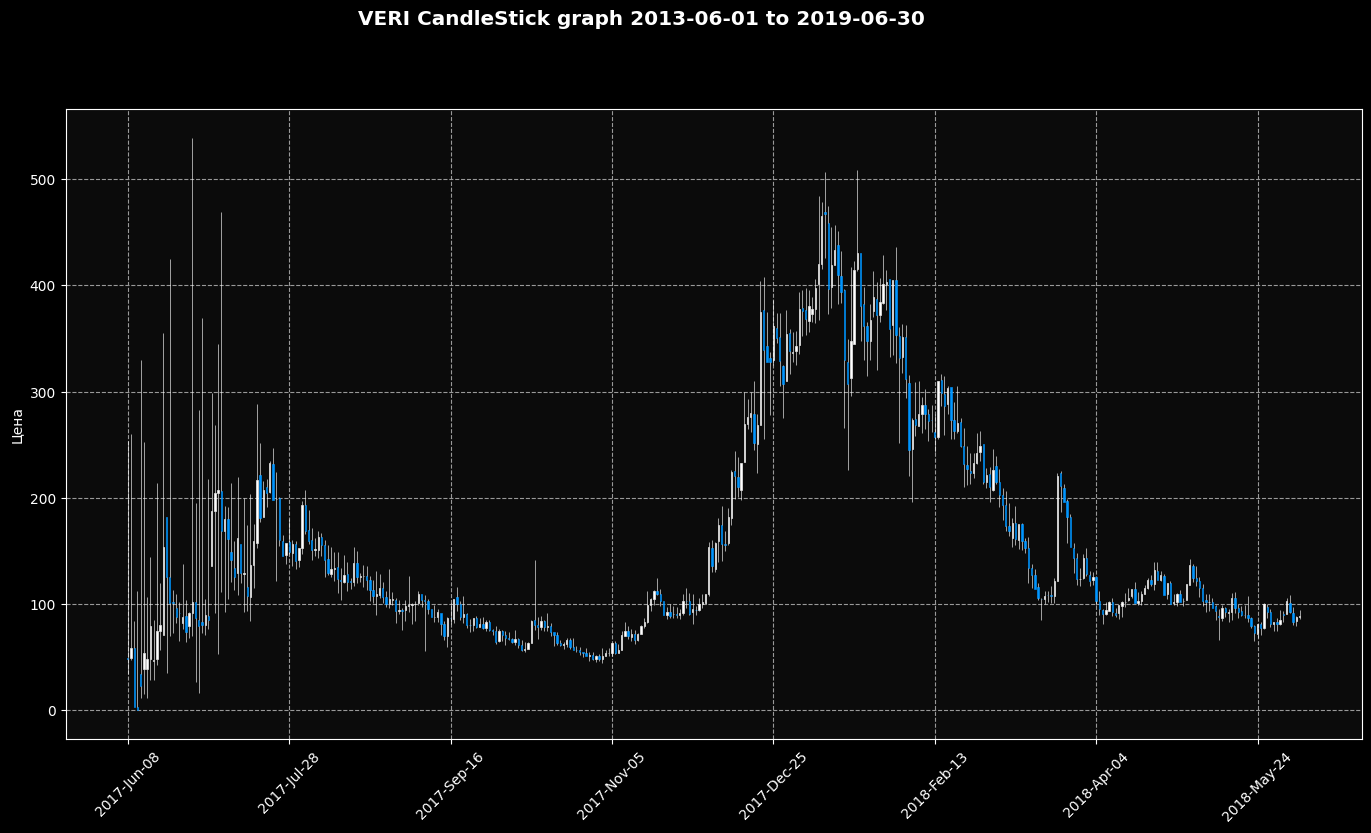

In [41]:
coins = pd.read_csv('coins.csv')
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')
# plot_fancy_price_action(coins, 'BTC', '2018-05-18', '2018-06-07')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [39]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    # Paste your code here
    coins_pump_and_dump = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) &(coins['date'] <= end_date)]
    max_pnd = 0
    max_pnd_date = None
    for index, row in coins_pump_and_dump.iterrows():
        max_open_close = max(row['open'], row['close'])
        if max_open_close > 0:
            pnd = row['high'] / max_open_close
            if pnd > max_pnd:
                max_pnd = pnd
                max_pnd_date = row['date']
    return max_pnd_date, max_pnd


In [40]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

Сравните эти значения для разных монет:

In [42]:
find_most_severe_pump_and_dump(coins, symbol='LTC', start_date='2017-06-01', end_date='2018-06-01')

('2018-02-07', 1.1082257158899496)

In [43]:
find_most_severe_pump_and_dump(coins, symbol='VERI', start_date='2017-06-01', end_date='2018-06-01')

('2017-06-11', 33.549253731343285)

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [44]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here
    coins['date'] = pd.to_datetime(coins['date'])

    coins_ROI = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date)]
    total_investment = 0
    total_initial_value = 0
    total_final_value = 0

    for coin, investment in investments.items():
        if coin in coins_ROI['symbol'].values:
            initial_row = coins_ROI[coins_ROI['date'] == coins_ROI['date'].min()]
            if not initial_row.empty:
                initial_price = initial_row[initial_row['symbol'] == coin]['open'].values[0]
                total_initial_value += initial_price * (investment / initial_price)
                total_investment += investment
            final_row = coins_ROI[coins_ROI['date'] == coins_ROI['date'].max()]
            if not final_row.empty:
                final_price = final_row[final_row['symbol'] == coin]['close'].values[0]
                total_final_value += final_price * (investment / initial_price)
    roi = (total_final_value - total_investment) / total_investment if total_investment > 0 else 0

    return roi

In [45]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.027221083037452142

In [46]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.35085448945653

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [47]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here
    coin_data = coins[coins['symbol'] == symbol].copy()
    coin_data['date'] = pd.to_datetime(coin_data['date'])
    coin_data.sort_values('date', inplace=True)

    coin_data['MA'] = coin_data['price'].rolling(window=window).mean()
    coin_data['STD'] = coin_data['price'].rolling(window=window).std()

    coin_data['Upper Band'] = coin_data['MA'] + (coin_data['STD'] * width)
    coin_data['Lower Band'] = coin_data['MA'] - (coin_data['STD'] * width)

    plt.figure(figsize=(14, 7))

    plt.plot(coin_data['date'], coin_data['price'], label='Цена', color='blue')

    plt.plot(coin_data['date'], coin_data['MA'], label=f'SMA {window} дней', color='orange')

    plt.plot(coin_data['date'], coin_data['Upper Band'], label='Верхняя граница Боллинджера', color='red', linestyle='--')

    plt.plot(coin_data['date'], coin_data['Lower Band'], label='Нижняя граница Боллинджера', color='green', linestyle='--')


    plt.title(f'График цен для {coin_data["name"].iloc[0]} ({symbol}) с границами Боллинджера')
    plt.xlabel('Дата')
    plt.ylabel('Цена в USD')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


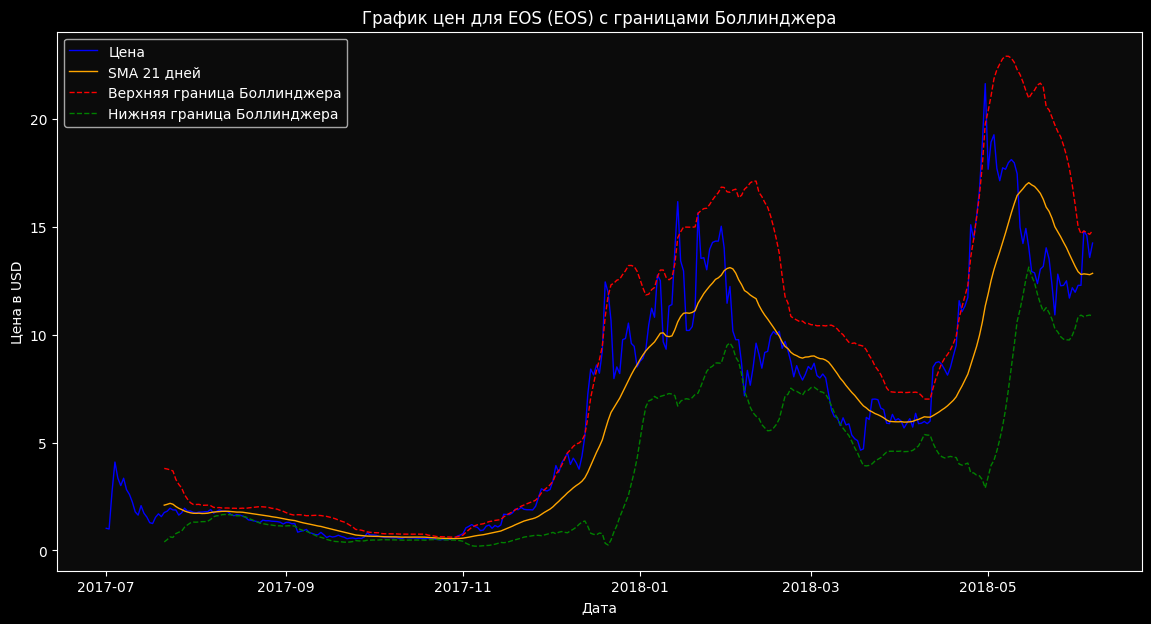

In [48]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут**

Если придерживаться и покупать на лоях (когда цена касается нижней границы moving average), то видно, что, например, если бы это сделали после 2018-03, то цена бы падала дальше, т.е. стоимость инвестиций бы снижалась, т.е. теряли бы деньги. Также видно, что, если придерживаться правила продавать, когда цена касается верхнего moving average, то можно было продать за 7 USD при том, что цена и дальше продолжает касаться moving average вплоть до около 20 USD, т.е. потенциально не получили прибыли 3x. Вывод: часто правило не работает

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [49]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here
    coins['date'] = pd.to_datetime(coins['date'])

    coins_marketcap = coins[coins['date'] >= start_date]

    selected_coins = coins_marketcap[coins_marketcap['symbol'].isin(symbols)]

    total_market_cap = selected_coins.groupby('date')['market'].sum()

    individual_cap = selected_coins.groupby(['date', 'symbol'])['market'].sum().unstack()

    plt.figure(figsize=(12, 6))
    total_market_cap.plot(label='Total Market Cap', color='black', linewidth=2)

    for symbol in symbols:
        if symbol in individual_cap.columns:
            individual_cap[symbol].plot(label=f'{symbol} Market Cap')

    plt.title('Overall Capitalization of Givan Coins')
    plt.xlabel('Date')
    plt.ylabel('Market Capitalization (USD)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    market_shares = individual_cap.div(total_market_cap, axis=0) * 100  # Доля в процентах

    for symbol in symbols:
        if symbol in market_shares.columns:
            market_shares[symbol].plot(label=f'Share of {symbol} Market Cap')

    plt.title('Market Cap Shares of Selected Coins')
    plt.xlabel('Date')
    plt.ylabel('Market Capitalization Share (%)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

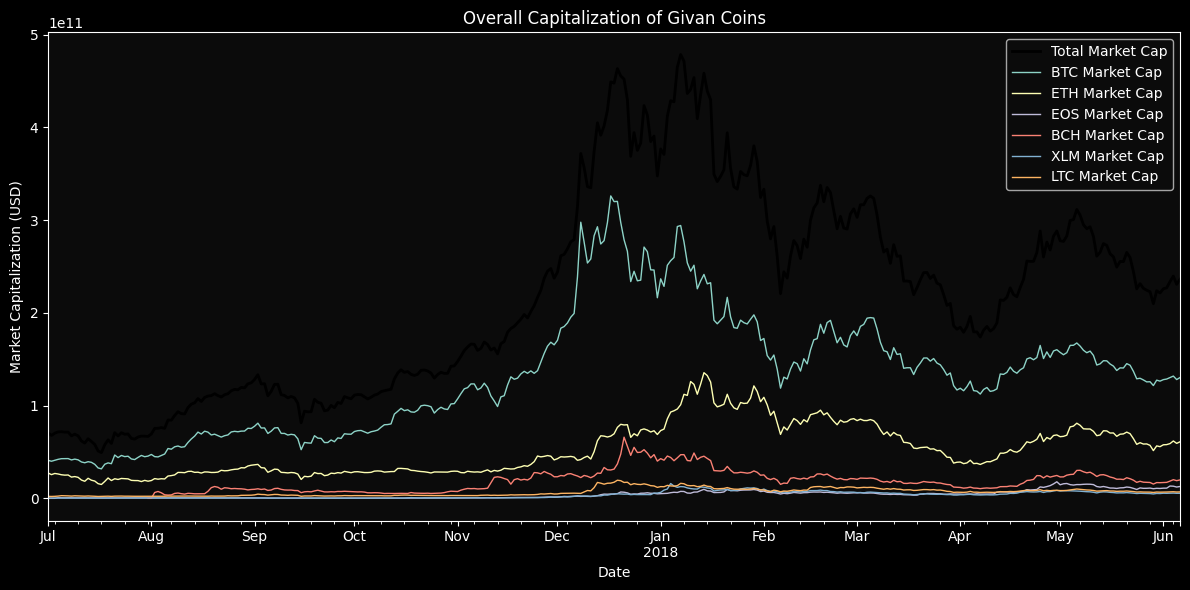

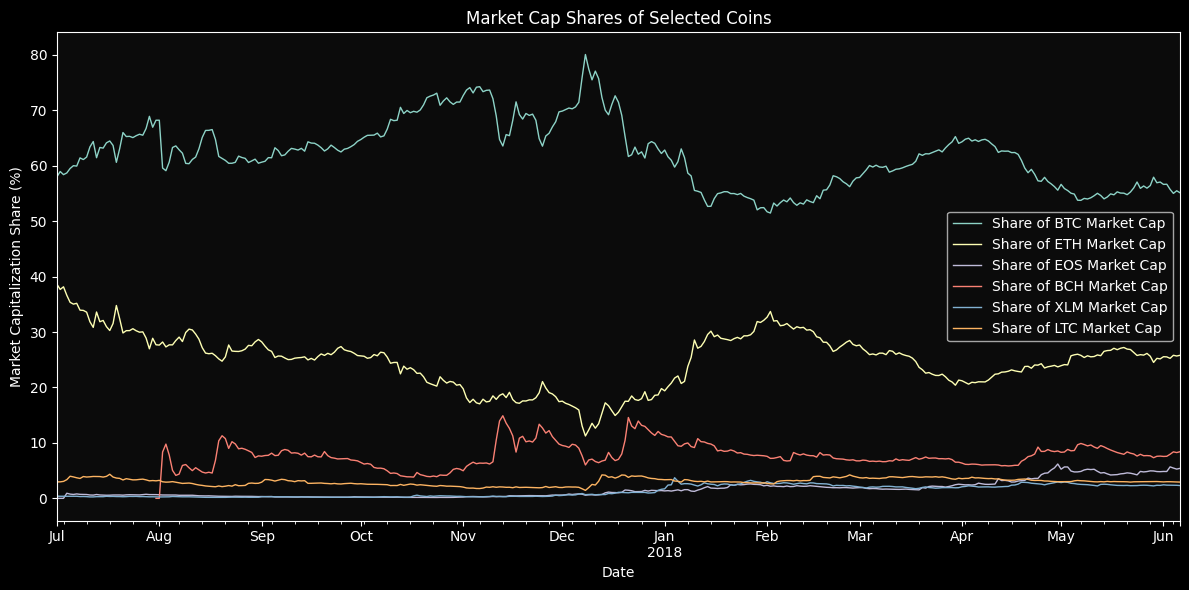

In [50]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

На графике отражено, что капитализация рынка биткоина находится на пике в конце 2017-начале 2018 года. Если посмотреть на цены биткоина, то видно, что стоимость одного биткоина росла до конца 2017 года и затем начала снижаться. При прочих равных (одно и то же количество монет, т.е. при том же объёме рынка), очевидно, что рыночная капитализация биткоина увеличивалась, а поэтому и доля биткоина увеличивалась среди всех монет, если у остальных монет не было такого роста. Выводы: при увеличении в стоимости одной монеты, например, биткоина, растет доля рыночной капитализации биткоина (на биткоине это особо заментно, т.к. высокая доля), при падении стоимости одного биткоина (в начале 2018 г., например), доля рыночной капитализации биткоина снижается.

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [51]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here
    coins['date'] = pd.to_datetime(coins['date'])
    coins_filtered = coins[(coins['symbol'].isin(symbols)) & (coins['date'] <= date)]
    market_cap = coins_filtered.pivot_table(index='date', columns='symbol', values='market', aggfunc='sum')
    smoothed_market_cap = market_cap.ewm(span=window, adjust=False).mean()
    total_market_cap = smoothed_market_cap.sum(axis=1)
    market_shares = smoothed_market_cap.divide(total_market_cap, axis=0)
    correlations = market_shares.corr()
    return correlations

In [52]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:

correlations.style.background_gradient(cmap='coolwarm')


symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.000000,0.340224,-0.844026,0.536759,0.467315,0.590766,0.876862
BCH,0.340224,1.000000,-0.177618,0.184204,-0.465242,-0.073052,0.238013
BTC,-0.844026,-0.177618,1.000000,-0.672216,-0.937374,0.034441,-0.711276
EOS,0.536759,0.184204,-0.672216,1.000000,-0.065813,0.361642,0.847045
ETH,0.467315,-0.465242,-0.937374,-0.065813,1.000000,0.334120,0.525919
LTC,0.590766,-0.073052,0.034441,0.361642,0.334120,1.000000,0.448558
XLM,0.876862,0.238013,-0.711276,0.847045,0.525919,0.448558,1.000000


Довольно интересно ещё взглянуть на 2017-12-27:

In [54]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm')

symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.000000,0.393545,0.135255,0.925571,-0.664737,0.653695,0.966599
BCH,0.393545,1.000000,0.091874,0.203686,-0.584462,-0.303506,0.328045
BTC,0.135255,0.091874,1.000000,0.151102,-0.967976,0.131559,-0.349549
EOS,0.925571,0.203686,0.151102,1.000000,-0.299847,0.368868,0.686548
ETH,-0.664737,-0.584462,-0.967976,-0.299847,1.000000,0.182788,0.521245
LTC,0.653695,-0.303506,0.131559,0.368868,0.182788,1.000000,0.367229
XLM,0.966599,0.328045,-0.349549,0.686548,0.521245,0.367229,1.000000


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

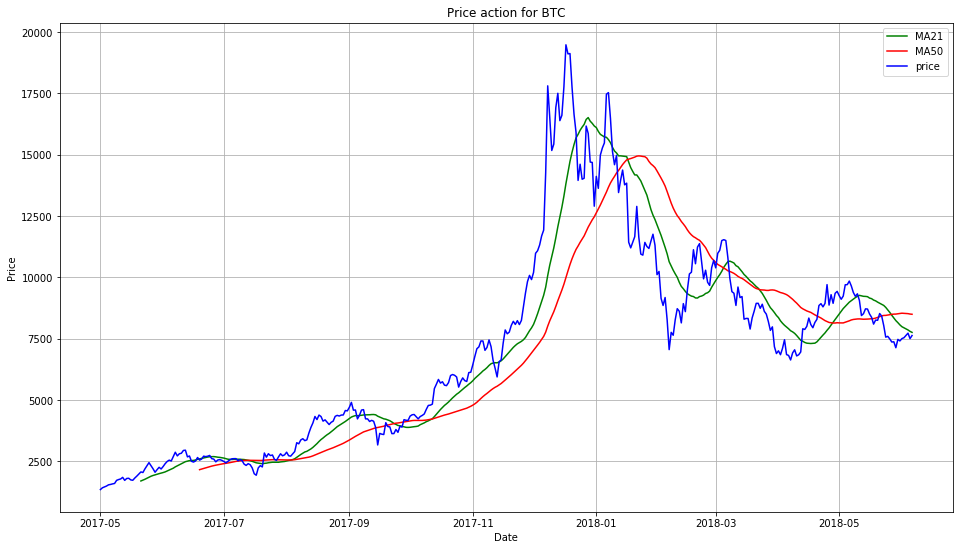

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.